## 필수과제 1.2
### 요일 지수에 따른 시각화와 인사이트 정리
* 데이터 내 요일별 전환율에 대한 차이 검정 진행 (ANOVA or Kruskal-Wallis test)
    * 정규성 검정 결과 요일별 전환율은 정규성 가정을 만족하지 못하기 때문에 비모수 검정 진행
    * 검정 결과 cart -> purhcase, view -> purchase 에는 요일별 유의미한 차이가 있음
        * 카트에 추가하는 행동보다 구매를 진행하는 행동에 요일 요인이 있는 것으로 볼 수 있음 
* 차이가 있는 경우 어느 요일이 더 전환율이 증가하는지?
    * 상대적으로 수요일, 목요일의 전환율이 다른 요일에 비해 큰 것으로 확인

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
daily_funnel_df = pd.read_pickle('../dataset/total_event_agg.pkl')
daily_funnel_df.head()

event_type,cart,purchase,remove_from_cart,view,view_to_cart_ratio,cart_to_purchase_ratio,view_to_purchase_ratio
event_date,,,,,,,
2019-10-01,7676,1001,2562,18392,41.74,13.04,5.44
2019-10-02,22133,1045,2633,32954,67.16,4.72,3.17
2019-10-03,4804,1048,2522,15468,31.06,21.82,6.78
2019-10-04,3891,892,2265,13932,27.93,22.92,6.40
2019-10-05,4617,708,1935,14320,32.24,15.33,4.94


In [4]:
daily_funnel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 2019-10-01 to 2019-12-31
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cart                    92 non-null     int64  
 1   purchase                92 non-null     int64  
 2   remove_from_cart        92 non-null     int64  
 3   view                    92 non-null     int64  
 4   view_to_cart_ratio      92 non-null     float64
 5   cart_to_purchase_ratio  92 non-null     float64
 6   view_to_purchase_ratio  92 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 5.8+ KB


In [10]:
daily_funnel_df = daily_funnel_df.reset_index()
daily_funnel_df['event_date'] = pd.to_datetime(daily_funnel_df['event_date'])
daily_funnel_df.head()

event_type,event_date,cart,purchase,remove_from_cart,view,view_to_cart_ratio,cart_to_purchase_ratio,view_to_purchase_ratio
0,2019-10-01,7676,1001,2562,18392,41.74,13.04,5.44
1,2019-10-02,22133,1045,2633,32954,67.16,4.72,3.17
2,2019-10-03,4804,1048,2522,15468,31.06,21.82,6.78
3,2019-10-04,3891,892,2265,13932,27.93,22.92,6.40
4,2019-10-05,4617,708,1935,14320,32.24,15.33,4.94


In [11]:
# 요일별 분포
# 월요일 0, 일요일 6
daily_funnel_df['days'] = daily_funnel_df['event_date'].dt.dayofweek
daily_funnel_df.head()

event_type,event_date,cart,purchase,remove_from_cart,view,view_to_cart_ratio,cart_to_purchase_ratio,view_to_purchase_ratio,days
0,2019-10-01,7676,1001,2562,18392,41.74,13.04,5.44,1
1,2019-10-02,22133,1045,2633,32954,67.16,4.72,3.17,2
2,2019-10-03,4804,1048,2522,15468,31.06,21.82,6.78,3
3,2019-10-04,3891,892,2265,13932,27.93,22.92,6.40,4
4,2019-10-05,4617,708,1935,14320,32.24,15.33,4.94,5


In [15]:
import scipy.stats as stats

In [16]:
for day in daily_funnel_df['days'].unique():
    sample = daily_funnel_df[daily_funnel_df['days'] == day]['view_to_cart_ratio']
    stat, p = stats.shapiro(sample)
    print(f"{day}: Shapiro-Wilk p-value = {p:.4f}")
    if p >= .05:
        print('정규성 만족 >> view_to_cart_ratio')

1: Shapiro-Wilk p-value = 0.0076
2: Shapiro-Wilk p-value = 0.0000
3: Shapiro-Wilk p-value = 0.1845
정규성 만족 >> view_to_cart_ratio
4: Shapiro-Wilk p-value = 0.0379
5: Shapiro-Wilk p-value = 0.3859
정규성 만족 >> view_to_cart_ratio
6: Shapiro-Wilk p-value = 0.0000
0: Shapiro-Wilk p-value = 0.0001


In [17]:
for day in daily_funnel_df['days'].unique():
    sample = daily_funnel_df[daily_funnel_df['days'] == day]['cart_to_purchase_ratio']
    stat, p = stats.shapiro(sample)
    print(f"{day}: Shapiro-Wilk p-value = {p:.4f}")
    if p >= .05:
        print('정규성 만족 >> cart_to_purchase_ratio')

1: Shapiro-Wilk p-value = 0.1666
정규성 만족 >> cart_to_purchase_ratio
2: Shapiro-Wilk p-value = 0.0000
3: Shapiro-Wilk p-value = 0.0470
4: Shapiro-Wilk p-value = 0.0150
5: Shapiro-Wilk p-value = 0.7446
정규성 만족 >> cart_to_purchase_ratio
6: Shapiro-Wilk p-value = 0.0019
0: Shapiro-Wilk p-value = 0.0070


In [18]:
for day in daily_funnel_df['days'].unique():
    sample = daily_funnel_df[daily_funnel_df['days'] == day]['view_to_purchase_ratio']
    stat, p = stats.shapiro(sample)
    print(f"{day}: Shapiro-Wilk p-value = {p:.4f}")
    if p >= .05:
        print('정규성 만족 >> view_to_purchase_ratio')

1: Shapiro-Wilk p-value = 0.0013
2: Shapiro-Wilk p-value = 0.0004
3: Shapiro-Wilk p-value = 0.0038
4: Shapiro-Wilk p-value = 0.0015
5: Shapiro-Wilk p-value = 0.0019
6: Shapiro-Wilk p-value = 0.0020
0: Shapiro-Wilk p-value = 0.0064


In [20]:
stat, p_value = stats.levene(
    daily_funnel_df[daily_funnel_df['days'] == 0]['view_to_cart_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 1]['view_to_cart_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 2]['view_to_cart_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 3]['view_to_cart_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 4]['view_to_cart_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 5]['view_to_cart_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 6]['view_to_cart_ratio'],
)

print(f"Levene’s Test p-value: {p_value:.4f}")

# 등분산성 해석
if p_value < 0.05:
    print("등분산성이 없음 (p < 0.05)")
else:
    print("등분산성이 있음 (p ≥ 0.05)")

Levene’s Test p-value: 0.9867
등분산성이 있음 (p ≥ 0.05)


In [21]:
stat, p_value = stats.levene(
    daily_funnel_df[daily_funnel_df['days'] == 0]['cart_to_purchase_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 1]['cart_to_purchase_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 2]['cart_to_purchase_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 3]['cart_to_purchase_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 4]['cart_to_purchase_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 5]['cart_to_purchase_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 6]['cart_to_purchase_ratio'],
)

print(f"Levene’s Test p-value: {p_value:.4f}")

# 등분산성 해석
if p_value < 0.05:
    print("등분산성이 없음 (p < 0.05)")
else:
    print("등분산성이 있음 (p ≥ 0.05)")

Levene’s Test p-value: 0.9145
등분산성이 있음 (p ≥ 0.05)


In [22]:
stat, p_value = stats.levene(
    daily_funnel_df[daily_funnel_df['days'] == 0]['view_to_purchase_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 1]['view_to_purchase_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 2]['view_to_purchase_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 3]['view_to_purchase_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 4]['view_to_purchase_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 5]['view_to_purchase_ratio'],
    daily_funnel_df[daily_funnel_df['days'] == 6]['view_to_purchase_ratio'],
)

print(f"Levene’s Test p-value: {p_value:.4f}")

# 등분산성 해석
if p_value < 0.05:
    print("등분산성이 없음 (p < 0.05)")
else:
    print("등분산성이 있음 (p ≥ 0.05)")

Levene’s Test p-value: 0.8194
등분산성이 있음 (p ≥ 0.05)


In [24]:
# Kruskal-Wallis Test
kruskal_result = stats.kruskal(*(daily_funnel_df[daily_funnel_df['days'] == day]['view_to_cart_ratio'] for day in daily_funnel_df['days'].unique()))
print("Kruskal-Wallis p-value:", kruskal_result.pvalue)
if kruskal_result.pvalue < .05:
    print('비모수 검정 결과 >> 요일별 view-cart 전환에 유의미한 차이가 있음')
else:
    print('비모수 검정 결과 >> 요일별 유의미한 차이가 없음')

Kruskal-Wallis p-value: 0.8086978623359461
비모수 검정 결과 >> 요일별 유의미한 차이가 없음


In [25]:
# Kruskal-Wallis Test
kruskal_result = stats.kruskal(*(daily_funnel_df[daily_funnel_df['days'] == day]['cart_to_purchase_ratio'] for day in daily_funnel_df['days'].unique()))
print("Kruskal-Wallis p-value:", kruskal_result.pvalue)
if kruskal_result.pvalue < .05:
    print('비모수 검정 결과 >> 요일별 cart-purchase 전환에 유의미한 차이가 있음')
else:
    print('비모수 검정 결과 >> 요일별 유의미한 차이가 없음')

Kruskal-Wallis p-value: 0.005619582740878683
비모수 검정 결과 >> 요일별 cart-purchase 전환에 유의미한 차이가 있음


In [26]:
# Kruskal-Wallis Test
kruskal_result = stats.kruskal(*(daily_funnel_df[daily_funnel_df['days'] == day]['view_to_purchase_ratio'] for day in daily_funnel_df['days'].unique()))
print("Kruskal-Wallis p-value:", kruskal_result.pvalue)
if kruskal_result.pvalue < .05:
    print('비모수 검정 결과 >> 요일별 view-purchase 전환에 유의미한 차이가 있음')
else:
    print('비모수 검정 결과 >> 요일별 유의미한 차이가 없음')

Kruskal-Wallis p-value: 0.004899499186833028
비모수 검정 결과 >> 요일별 view-purchase 전환에 유의미한 차이가 있음


In [ ]:
daily_funnel_df.groupby('days')['cart_to_purchase_ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
days,,,,,,,,
0,13.0,20.651538,4.546687,8.31,21.0500,21.92,22.2800,25.80
1,14.0,20.919286,3.951295,13.04,20.3575,21.76,23.0175,26.64
2,13.0,21.457692,5.222814,4.72,22.0100,22.70,23.1400,25.15
3,13.0,23.823077,1.694886,21.82,22.2100,24.07,25.3300,26.35
4,13.0,24.175385,2.899203,20.98,22.2500,23.38,24.9600,30.28
5,13.0,21.196154,3.336227,15.33,19.8200,21.27,22.2000,27.31
6,13.0,20.850000,6.349941,4.28,19.8700,20.69,21.9200,34.50


In [ ]:
daily_funnel_df.groupby('days')['view_to_purchase_ratio'].describe()

,count,mean,std,min,25%,50%,75%,max
days,,,,,,,,
0,13.0,5.654615,1.106252,2.81,5.50,6.07,6.2400,6.82
1,14.0,5.661429,1.020421,2.56,5.45,5.79,6.2575,6.58
2,13.0,5.897692,0.911310,3.17,5.80,6.22,6.3200,6.58
3,13.0,6.773846,1.153954,5.58,6.06,6.30,6.7800,8.94
4,13.0,6.733846,1.807736,5.06,5.58,5.84,6.4600,10.34
5,13.0,5.629231,1.266461,4.41,4.94,5.06,5.8300,8.61
6,13.0,5.593846,1.757230,2.72,5.25,5.44,5.8900,10.62


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


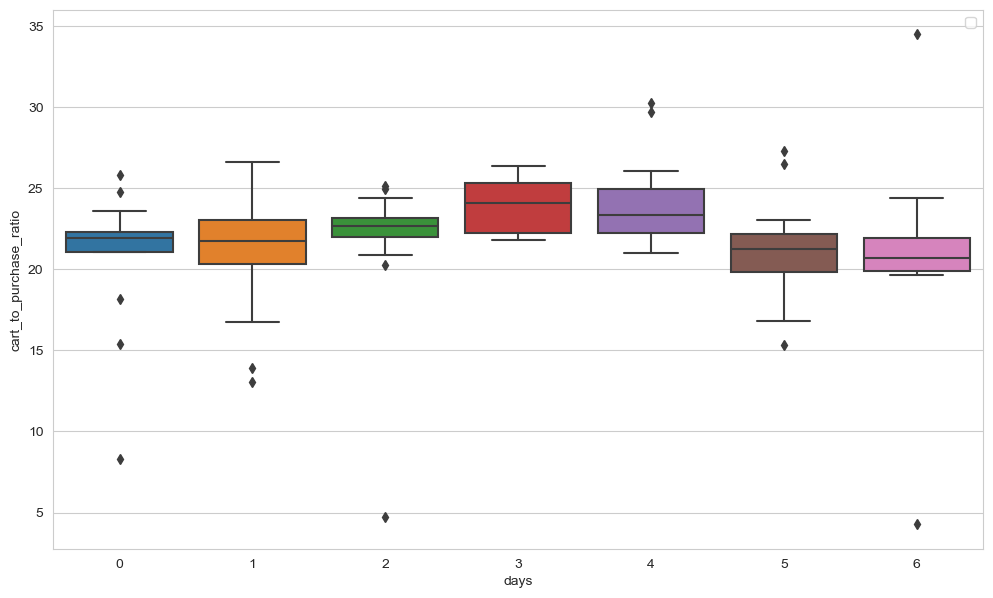

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(data=daily_funnel_df, x='days', y='cart_to_purchase_ratio')
plt.show()

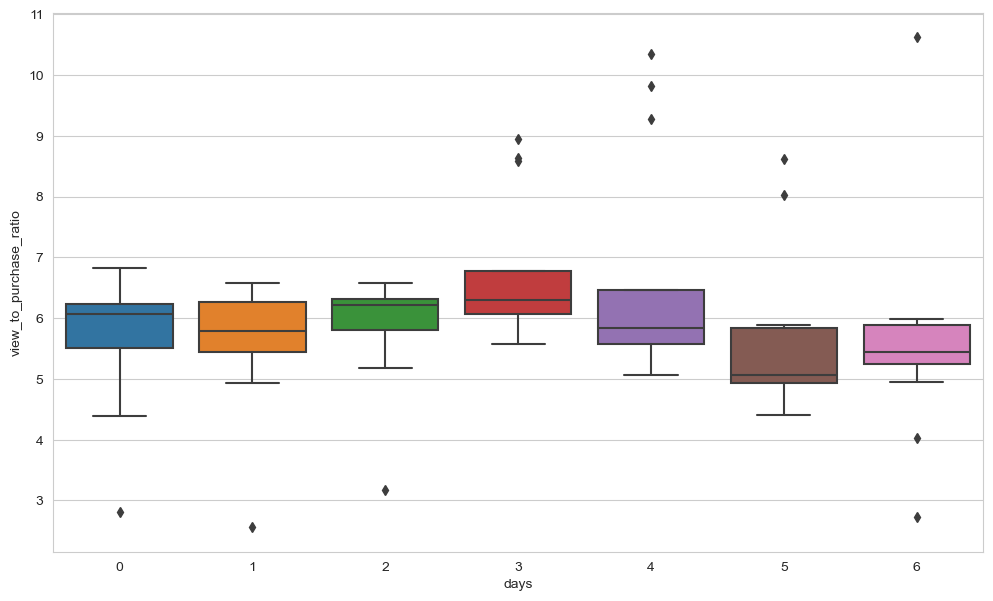

In [38]:
plt.figure(figsize=(12,7))
sns.boxplot(data=daily_funnel_df, x='days', y='view_to_purchase_ratio')
plt.show()